# Introduction to R

- author: Uku-Kaspar Uustalu & Kyle Monahan 
- date: 2024-02-16

## Getting Started 

R is a statistical platform similar to Stata, SAS, and SPSS. This software allows you to manipulate data, perform descriptive statistics, recoding variables, and bringing in your own data. If you're reading this, you've opened RStudio (the development environment for R) and you're on the way! We will walk through this document together in the workshop. 

If you see code that looks like this: `code`, this refers to code that you could write in the R console. 

## Set working directory 
The first thing we need to do is to set a working directory. Go to Session > Set Working Directory > To Source File location. This is always good practice! 

## Comments

You write a comment by adding a # to the start of a line in an R script or the code section in R markdown. Or you could select the lines you wish to comment and press Ctrl/Cmd+Shift+C. We will not be writing a script, only running one, but the idea is the same. The text in GREEN (if you are using the default theme) is a comment.

## Assigning Variables
The first thing we can do is assign a variable. This looks like an arrow placing a value into a variable. Like this: 'n <- 200'.

To assign the variable, we need to run the code below. Click the "Run" button below to assign a variable `n` equal to the value two-hundred. The run button looks like a small play button. 

The box below is called an **R code chunk**, and it lets us run R code inside this R markdown notebook.

In [1]:
n <- 200
# The variable n is set equal to 200. 

# You can write a comment in an RScript by writing a "#"

This created a variable `n` which we can access in R. The value appears in the Environment tab, on the upper right-hand side of the window. 

> Tip: If you can't see the console window, just click on the word "Console" below. The `>` tells you that R is waiting for your input! The engine is running, and we can either control it with the Run button or the Console directly. 

Now if you call n, you will see the console report its value.

In [2]:
n

[1] 200

## Console Window
YOUR TURN: Try setting 'n <- 300' in the Console Window! After you are done, print 'n'.

If you cannot see the Console Window, click on the word "Console" below.

Try typing 'N' in the Console Window. What happens? The variable 'N' is not found, because 'n' is the name of the variable, not 'N'. R is case-sensitive!
## Functions and Vectors
What if you have multiple numbers to set as a variable? For example, what if we wanted to store the scores we got on exams? These include 94, 96, 72, and 92. (The third test was really hard.)

We use the combine function, which is 'c(n, n, n, ... n)'

In [3]:
scores <- c(94, 96, 72, 92)

This assigns our scores to the variable "scores" in the Environment. If we call the variable...

In [4]:
scores

[1] 94 96 72 92

We see the values are printed. This is called a vector. One can access the values within a vector by using square braces '[]'. To get the second score, we use...

In [5]:
scores[2]

[1] 96

Note that R is one-indexed. To get the first score, we use '[1]', not '[0]'.

## Operators
To check if a vector contains an element, we can use the %in% operator.

In [6]:
96 %in% scores

[1] TRUE

It returns TRUE if the vector contains the element...

In [7]:
100 %in% scores

[1] FALSE

and FALSE if it does not. TRUE and FALSE are boolean datatypes, also known as logical datatypes in R. These are commonly used to denote binary variables.


## Descriptive Statistics

The best thing about having multiple values to work with is that we can calculate various statistics. Most statistical functions in R easily take a whole vector as input. Let us see what our final semester score would be!

In [8]:
mean(scores)    # mean
median(scores)  # median
sd(scores)      # standard deviation

[1] 88.5

[1] 93

[1] 11.12055

## Running from History
Take a look at the History tab on the right next to the Environment tab. 
This is where you will find commands you have run in the past.If you double click one, it will auto fill in the Console below.

Select a command from the History tab and double-click on it.
Then select the console window and press Enter/Return to run the command.


## The Environment
Now click on the Environment tab. We see two objects, labeled as Values. These include scores and n.

If you ever forget objects and do not want to click on the Environment tab, you can always call the function objects() for a list of all object names.

In [9]:
objects()

[1] "n"      "scores"

## Modifying a Vector

Suddenly, we were able to retake a test. Great!
Now we have to replace the value of 72 (the lowest score) with our new score of 85. We can assign the new value to the specific index we want to replace.

In [10]:
scores[3] <- 85

## Saving Variables and Creating Tables

Re-calculate stats given our retake and create new values to store them.
In R you can store almost anything as a variable, and you should take advantage of that. Always save anything that you might need going forward.

In [11]:
scores_mean <- mean(scores)
scores_median <- median(scores)
scores_sd <- sd(scores)
# To store the values, remember to assign them to variables.

Now we can create a table with a function called rbind():

In [12]:
scores_table <- rbind(Mean = scores_mean,
                      Median = scores_median,
                      SD = scores_sd)
scores_table

Mean,91.750000
Median,93.000000
SD,4.787136


When creating the table, we save it as an object (scores_table).
This allows us to refer back to this table at any point later in the script.

In [13]:
class(scores_table)

[1] "matrix" "array"

We can see that our scores_table is a matrix. Matrices are the most primitive form of table supported in R. Although matrices support both row and column names, they are not best structure to use for working with tabular data.

In [14]:
rownames(scores_table)
colnames(scores_table)

[1] "Mean"   "Median" "SD"

NULL

Note how our column is unnamed. We can easily fix this as follows.

In [15]:
colnames(scores_table) <- c("Value")
scores_table

,Value
Mean,91.750000
Median,93.000000
SD,4.787136


You can round values to the nearest whole number using the round() function:

In [16]:
round(scores_table)

,Value
Mean,92
Median,93
SD,5


But what if we wanted to keep a certain number of decimal places?
We can use help() to pull up the function's documentation and investigate.

In [17]:
help(round)

Looks like we can specify an additional argument named "digits" to do this:

In [18]:
round(scores_table, digits = 2)

,Value
Mean,91.75
Median,93.00
SD,4.79


Omitting the name of the argument is allowed and does not change the result.

In [19]:
scores_table <- round(scores_table, 2)
scores_table

,Value
Mean,91.75
Median,93.00
SD,4.79


Do you think omitting the names of optional arguments is good practice? Why?
Also note how on code above, we first rounded every score in scores_table to two decimal places, creating a new table. Then we assigned this table to the variable scores_table, replacing the previous table.

## Working with Real Data 

Now you have mastered the basics of R. But we really want to learn how to import data! So let us do that.

We have a CSV file of the Atlantic Hurricane Database (HURDAT2) 1851-2022. The data is released by the National Hurricane Center (NHC) at NOAA.

In [20]:
download.file(url ="https://tufts.box.com/shared/static/gdqc9tdv7334622tkco37oyg9t2fyeaf.csv",destfile = "atlantic.csv")

But how do we import this data so we can use it in R?

## Working Directory

All relative file paths in R are relative to the current working directory, which might or might not be the location of the R script, depending on how RStudio was originally launched. If RStudio was launched by double-clicking on the R script or by right-clicking on the R script and then selecting Open With > RStudio, the default working directory will be the location of the R script. Otherwise the default working directory will either be your Documents directory (Windows) or your home directory (macOS and Linux).

We can use getwd() and dir() to explore the current working directory.

In [21]:
getwd()     # The current location of the working directory.
dir()       # The files in the working directory.

[1] "/home/runner/work/guides/guides/source/source/r"

[1] "01_intro-r.Rmd"             "02_r-data-viz-test.md"     
[3] "03_IntermediateR_2020.Rmd"  "04_ParallelProcessingR.Rmd"
[5] "animation.gif"              "atlantic.csv"              
[7] "index.md"                   "r_data_dataviz"            
[9] "r-data-viz_files"

Your working directory should be the "intro-r-workshop" directory and it should contain both the current script (intro-r.R) and the data file (atlantic.csv). You can use the %in% operator to ensure this is the case.

In [22]:
"atlantic.csv" %in% dir()

[1] TRUE

If the statement above returns TRUE, you are all set. But if it returns FALSE, you need to change your working directory. The intro-r.R script and the atlantic.csv data file should have been downloaded to the same location. Ensure that they are both right next to each other in the same folder and then set the working directory to the folder containing your script via Session > Set Working Directory > To Source File Location.

We can ensure the working directory is set correctly by either re-running the commands from above or clicking on the Files tab in the lower-right panel and then selecting More > Go To Working Directory and exploring the results.

## Importing Data

The atlantic.csv data file is in comma-separated values (CSV) format. (Note that the specifics of this format are outlined in standard RFC 4180.) This is a very common data format and you can easily import it in R as follows.

In [23]:
hurrdata <- read.csv("atlantic.csv")

The read.csv() function has numerous additional optional arguments that we can use to specify how exactly a data file should be read in and interpreted.

To investigate those, we can use the help() function or the ? operator.

In [24]:
?read.csv

Note that CSV files are different from Excel spreadsheets (XLS or XLSX files) and R does not contain the functionality to import the latter by default. An external community-developed package must be used to import Excel files. Installing and loading external packages is discussed later in this script.

## Exploring Data

We see that a new variable "hurrdata" has been added to the environment.

In [25]:
head(hurrdata)

,ID,Name,Date,Time,Event,Status,Latitude,Longitude,Maximum.Wind,Minimum.Pressure,⋯,Radii.NW.34kt,Radii.NE.50kt,Radii.SE.50kt,Radii.SW.50kt,Radii.NW.50kt,Radii.NE.64kt,Radii.SE.64kt,Radii.SW.64kt,Radii.NW.64kt,Maximum.Wind.Radius
,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,AL011851,UNNAMED,18510625,0,,HU,28.0N,94.8W,80,-999,⋯,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
2,AL011851,UNNAMED,18510625,600,,HU,28.0N,95.4W,80,-999,⋯,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
3,AL011851,UNNAMED,18510625,1200,,HU,28.0N,96.0W,80,-999,⋯,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
4,AL011851,UNNAMED,18510625,1800,,HU,28.1N,96.5W,80,-999,⋯,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
5,AL011851,UNNAMED,18510625,2100,L,HU,28.2N,96.8W,80,-999,⋯,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
6,AL011851,UNNAMED,18510626,0,,HU,28.2N,97.0W,70,-999,⋯,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999


This shows us a preview of the fist couple rows of the file.
You can also click on the data table under Environment > Data.

We can use summary() to get descriptive statistics.

In [26]:
summary(hurrdata)

      ID                Name                Date               Time       
 Length:53976       Length:53976       Min.   :18510625   Min.   :   0.0  
 Class :character   Class :character   1st Qu.:19180804   1st Qu.: 600.0  
 Mode  :character   Mode  :character   Median :19640609   Median :1200.0  
                                       Mean   :19554281   Mean   : 910.8  
                                       3rd Qu.:19961020   3rd Qu.:1800.0  
                                       Max.   :20221111   Max.   :2330.0  
    Event              Status            Latitude          Longitude        
 Length:53976       Length:53976       Length:53976       Length:53976      
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
             

We might wonder - what type of data is hurrdata?
We imported it from csv, but how is it stored?

In [27]:
class(hurrdata)

[1] "data.frame"

We can see that it is a "data.frame", commonly referred to as a data frame.
A data frame is a table where you have observations as rows and variables as columns. Data frames have some great features for working with data and are the go-to for R data storage. You can think of them almost as spreadsheets.

## Working with Data Frames

Let us say we want to access the maximum wind speed of the sixth observation.
We can do this in multiple ways.
Knowing that "Maximum.Wind" is the ninth column:

In [28]:
hurrdata[[6, 9]]    # [[row, column]]
hurrdata[[9]][6]    # [[column]][row]

[1] 70

[1] 70

NOTE: When using a data frame, we must use [[]] to access variable values.
[] will just give us a subset of the data frame, not the values themselves.

Alternatively, we could use the column name:

In [29]:
hurrdata[["Maximum.Wind"]][6]
hurrdata$Maximum.Wind[6]

[1] 70

[1] 70

Note the dollar sign ($). This is a special operator that allows us to access data.frame variables (columns) based on their name.

The "$" operator is the preferred way of accessing data.frame variables based on their name, as it removes the complexity of when to use [[]] vs [] and does not require quotation marks ... given your column names do not contain spaces.

Note how the read.csv() function automatically replaced spaces with periods in the column names to accommodate this. Underscores are also an acceptable alternative to spaces and other functions might use those instead of periods.

## Selecting Data Based on Conditions

Note how the summary() function from before did not provide much information on the columns containing textual (character/string) data. These columns can be analyzed further using the table() function. Can you guess what it does?

In [30]:
table(hurrdata$Name)


      ABBY       ABLE      AGNES    ALBERTO       ALEX       ALFA      ALICE 
       100        153         35        233        142         11        117 
    ALICIA      ALLEN    ALLISON       ALMA      ALPHA     AMELIA        AMY 
        25         46        121        130         55          6         31 
       ANA     ANDREA     ANDREW      ANITA       ANNA     ARLENE     ARTHUR 
       189         52         68         20        143        326        172 
    AUDREY       BABE      BAKER    BARBARA      BARRY      BECKY      BELLE 
        20         24        115         40        165        121         18 
    BERTHA      BERYL       BESS       BETA       BETH      BETSY      BETTY 
       275        181         13         52         29        182         42 
    BEULAH       BILL    BLANCHE        BOB     BONNIE     BRENDA       BRET 
       174        109         37        105        328        122        139 
   CAMILLE    CANDICE      CANDY      CARLA     CARMEN      CAR

It creates a frequency table of all the unique values in the column!
But what if we wanted to analyze hurricanes only with a specific name?

We can select rows based on a condition by combining logical operators with [] to subset all the rows where the logical operator returns TRUE. For example, all the hurricanes named Nicole can be extracted as follows.

In [31]:
hurrdata[hurrdata$Name == "NICOLE", ]

,ID,Name,Date,Time,Event,Status,Latitude,Longitude,Maximum.Wind,Minimum.Pressure,⋯,Radii.NW.34kt,Radii.NE.50kt,Radii.SE.50kt,Radii.SW.50kt,Radii.NW.50kt,Radii.NE.64kt,Radii.SE.64kt,Radii.SW.64kt,Radii.NW.64kt,Maximum.Wind.Radius
,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
41280,AL141998,NICOLE,19981124,0,,TD,28.3N,28.0W,30,1010,⋯,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
41281,AL141998,NICOLE,19981124,600,,TS,27.9N,29.1W,35,1005,⋯,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
41282,AL141998,NICOLE,19981124,1200,,TS,27.5N,30.1W,45,1000,⋯,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
41283,AL141998,NICOLE,19981124,1800,,TS,27.2N,31.1W,60,997,⋯,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
41284,AL141998,NICOLE,19981125,0,,TS,26.9N,32.0W,60,995,⋯,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
41285,AL141998,NICOLE,19981125,600,,TS,26.6N,32.9W,60,994,⋯,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
41286,AL141998,NICOLE,19981125,1200,,TS,26.3N,33.7W,55,994,⋯,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
41287,AL141998,NICOLE,19981125,1800,,TS,26.0N,34.6W,50,994,⋯,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
41288,AL141998,NICOLE,19981126,0,,TS,25.7N,35.4W,40,998,⋯,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999


Note that we leave the column index blank to select all the columns.

Alternatively, we could extract values from one column based on the values of another column. For example, the maximum wind speed for all the hurricanes named Nicole could be obtained as follows.

In [32]:
max(hurrdata$Maximum.Wind[hurrdata$Name == "NICOLE"])

[1] 120

## Data Cleaning: Dates & Strings
Let us say we want to analyze maximum wind speed by year.
Note how the date is stored as a number in YYYYMMDD format.
This notation is great for sorting but very inconvenient for analysis.

We can use the "$" operator to easily extract the Data column as follows.

In [33]:
hurrdata$Date

[1] 18510625 18510625 18510625 18510625 18510625 18510626 18510626 18510626
    [9] 18510626 18510627 18510627 18510627 18510627 18510628 18510705 18510710
   [17] 18510816 18510816 18510816 18510816 18510817 18510817 18510817 18510817
   [25] 18510818 18510818 18510818 18510818 18510819 18510819 18510819 18510819
   [33] 18510820 18510820 18510820 18510820 18510821 18510821 18510821 18510821
   [41] 18510822 18510822 18510822 18510822 18510823 18510823 18510823 18510823
   [49] 18510823 18510824 18510824 18510824 18510824 18510825 18510825 18510825
   [57] 18510825 18510826 18510826 18510826 18510826 18510827 18510827 18510827
   [65] 18510827 18510913 18510913 18510913 18510913 18510914 18510914 18510914
   [73] 18510914 18510915 18510915 18510915 18510915 18510916 18510916 18510916
   [81] 18510916 18511016 18511016 18511016 18511016 18511017 18511017 18511017
   [89] 18511017 18511018 18511018 18511018 18511018 18511019 18511019 18511019
   [97] 18511019 18511019 18520819 18520819 18520819 18520819 18520820 18520820
  [105] 18520820 18520820 18520821 18520821 18520821 18520821 18520822 18520822
  [113] 18520822 18520822 18520823 18520823 18520823 18520823 18520824 18520824
  [121] 18520824 18520824 18520825 18520825 18520825 18520825 18520826 18520826
  [129] 18520826 18520826 18520827 18520827 18520827 18520827 18520828 18520828
  [137] 18520828 18520828 18520829 18520829 18520829 18520829 18520830 18520905
  [145] 18520905 18520905 18520905 18520906 18520906 18520906 18520906 18520909
  [153] 18520909 18520909 18520909 18520910 18520910 18520910 18520910 18520911
  [161] 18520911 18520911 18520911 18520912 18520912 18520912 18520912 18520913
  [169] 18520913 18520913 18520913 18520922 18520922 18520922 18520922 18520923
  [177] 18520923 18520923 18520923 18520924 18520924 18520924 18520924 18520925
  [185] 18520925 18520925 18520925 18520926 18520926 18520926 18520926 18520927
  [193] 18520927 18520927 18520927 18520928 18520928 18520928 18520928 18520929
  [201] 18520929 18520929 18520929 18520930 18520930 18520930 18520930 18521006
  [209] 18521006 18521006 18521006 18521007 18521007 18521007 18521007 18521008
  [217] 18521008 18521008 18521008 18521009 18521009 18521009 18521009 18521009
  [225] 18521010 18521010 18521010 18521010 18521011 18521011 18521011 18521011
  [233] 18530805 18530810 18530830 18530830 18530830 18530830 18530831 18530831
  [241] 18530831 18530831 18530901 18530901 18530901 18530901 18530902 18530902
  [249] 18530902 18530902 18530903 18530903 18530903 18530903 18530904 18530904
  [257] 18530904 18530904 18530905 18530905 18530905 18530905 18530906 18530906
  [265] 18530906 18530906 18530907 18530907 18530907 18530907 18530908 18530908
  [273] 18530908 18530908 18530909 18530909 18530909 18530909 18530910 18530910
  [281] 18530910 18530910 18530908 18530908 18530908 18530908 18530909 18530909
  [289] 18530909 18530909 18530910 18530910 18530910 18530910 18530921 18530926
  [297] 18530926 18530926 18530926 18530927 18530927 18530927 18530927 18530928
  [305] 18530928 18530928 18530928 18530929 18530929 18530929 18530929 18530930
  [313] 18530930 18530930 18530930 18531001 18531001 18530928 18531019 18531019
  [321] 18531019 18531019 18531020 18531020 18531020 18531020 18531021 18531021
  [329] 18531021 18531021 18531022 18531022 18540625 18540625 18540625 18540625
  [337] 18540626 18540626 18540626 18540626 18540627 18540627 18540627 18540823
  [345] 18540907 18540907 18540907 18540907 18540908 18540908 18540908 18540908
  [353] 18540908 18540909 18540909 18540909 18540909 18540910 18540910 18540910
  [361] 18540910 18540911 18540911 18540911 18540911 18540912 18540912 18540912
  [369] 18540912 18540918 18540918 18540918 18540918 18540918 18540919 18540919
  [377] 18540919 18540919 18540920 18540920 18541020 18541020 18541020 18541020
  [385] 18541021 18541021 18541021 18541021 18541022 18541022 18541022 18541022
  [393] 18550806 18550810 18550810 18550810 18550810 18550811 18550811 18550811
  [4

Passing this column to the as.character() function will convert all the numbers into text (character data). Note the quotes around the new values.

In [34]:
as.character(hurrdata$Date)

[1] "18510625" "18510625" "18510625" "18510625" "18510625" "18510626"
    [7] "18510626" "18510626" "18510626" "18510627" "18510627" "18510627"
   [13] "18510627" "18510628" "18510705" "18510710" "18510816" "18510816"
   [19] "18510816" "18510816" "18510817" "18510817" "18510817" "18510817"
   [25] "18510818" "18510818" "18510818" "18510818" "18510819" "18510819"
   [31] "18510819" "18510819" "18510820" "18510820" "18510820" "18510820"
   [37] "18510821" "18510821" "18510821" "18510821" "18510822" "18510822"
   [43] "18510822" "18510822" "18510823" "18510823" "18510823" "18510823"
   [49] "18510823" "18510824" "18510824" "18510824" "18510824" "18510825"
   [55] "18510825" "18510825" "18510825" "18510826" "18510826" "18510826"
   [61] "18510826" "18510827" "18510827" "18510827" "18510827" "18510913"
   [67] "18510913" "18510913" "18510913" "18510914" "18510914" "18510914"
   [73] "18510914" "18510915" "18510915" "18510915" "18510915" "18510916"
   [79] "18510916" "18510916" "18510916" "18511016" "18511016" "18511016"
   [85] "18511016" "18511017" "18511017" "18511017" "18511017" "18511018"
   [91] "18511018" "18511018" "18511018" "18511019" "18511019" "18511019"
   [97] "18511019" "18511019" "18520819" "18520819" "18520819" "18520819"
  [103] "18520820" "18520820" "18520820" "18520820" "18520821" "18520821"
  [109] "18520821" "18520821" "18520822" "18520822" "18520822" "18520822"
  [115] "18520823" "18520823" "18520823" "18520823" "18520824" "18520824"
  [121] "18520824" "18520824" "18520825" "18520825" "18520825" "18520825"
  [127] "18520826" "18520826" "18520826" "18520826" "18520827" "18520827"
  [133] "18520827" "18520827" "18520828" "18520828" "18520828" "18520828"
  [139] "18520829" "18520829" "18520829" "18520829" "18520830" "18520905"
  [145] "18520905" "18520905" "18520905" "18520906" "18520906" "18520906"
  [151] "18520906" "18520909" "18520909" "18520909" "18520909" "18520910"
  [157] "18520910" "18520910" "18520910" "18520911" "18520911" "18520911"
  [163] "18520911" "18520912" "18520912" "18520912" "18520912" "18520913"
  [169] "18520913" "18520913" "18520913" "18520922" "18520922" "18520922"
  [175] "18520922" "18520923" "18520923" "18520923" "18520923" "18520924"
  [181] "18520924" "18520924" "18520924" "18520925" "18520925" "18520925"
  [187] "18520925" "18520926" "18520926" "18520926" "18520926" "18520927"
  [193] "18520927" "18520927" "18520927" "18520928" "18520928" "18520928"
  [199] "18520928" "18520929" "18520929" "18520929" "18520929" "18520930"
  [205] "18520930" "18520930" "18520930" "18521006" "18521006" "18521006"
  [211] "18521006" "18521007" "18521007" "18521007" "18521007" "18521008"
  [217] "18521008" "18521008" "18521008" "18521009" "18521009" "18521009"
  [223] "18521009" "18521009" "18521010" "18521010" "18521010" "18521010"
  [229] "18521011" "18521011" "18521011" "18521011" "18530805" "18530810"
  [235] "18530830" "18530830" "18530830" "18530830" "18530831" "18530831"
  [241] "18530831" "18530831" "18530901" "18530901" "18530901" "18530901"
  [247] "18530902" "18530902" "18530902" "18530902" "18530903" "18530903"
  [253] "18530903" "18530903" "18530904" "18530904" "18530904" "18530904"
  [259] "18530905" "18530905" "18530905" "18530905" "18530906" "18530906"
  [265] "18530906" "18530906" "18530907" "18530907" "18530907" "18530907"
  [271] "18530908" "18530908" "18530908" "18530908" "18530909" "18530909"
  [277] "18530909" "18530909" "18530910" "18530910" "18530910" "18530910"
  [283] "18530908" "18530908" "18530908" "18530908" "18530909" "18530909"
  [289] "18530909" "18530909" "18530910" "18530910" "18530910" "18530910"
  [295] "18530921" "18530926" "18530926" "18530926" "18530926" "18530927"
  [301] "18530927" "18530927" "18530927" "18530928" "18530928" "18530928"
  [307] "18530928" "18530929" "18530929" "18530929" "18530929" "18530930"
  [313] "18530930" "18530930" "18530930" "18531001" "18531001" "18530928"
  [319] "18531019" "18531019" "18531019" "18531019" "18531020" "18531020"
  [325] 

Let us store these new character (string) representations of the dates in a new variable and use the substr() function to extract the year and the month.

In [35]:
date_strings <- as.character(hurrdata$Date)

Extract the year from the date string (position 1-4).

In [36]:
hurrdata$Year <- substr(date_strings, start = 1, stop = 4)

Extract the month from the date string (position 5-6).

In [37]:
hurrdata$Month <- substr(date_strings, 5, 6)

Convert both new variables to numeric to accommodate further analysis.

In [38]:
hurrdata$Month <- as.numeric(hurrdata$Month)
hurrdata$Year <- as.numeric(hurrdata$Year)

Note that this is a somewhat hack-y way of dealing with dates. It is suitable for simple conversions like this, but it is highly encouraged to use external packages specifically designed to work with dates for more complex tasks.


## Making a Simple Scatter Plot

Let us say we would like to explore how the maximum wind speed of hurricanes has changed over time. A good visual tool to explore the relationship between two numerical variables is a scatter plot. We can use the built-in plot() function to create a quick and dirty scatter plot examining the relationship between time (denoted by the hurricane year) and hurricane maximum wind speed.

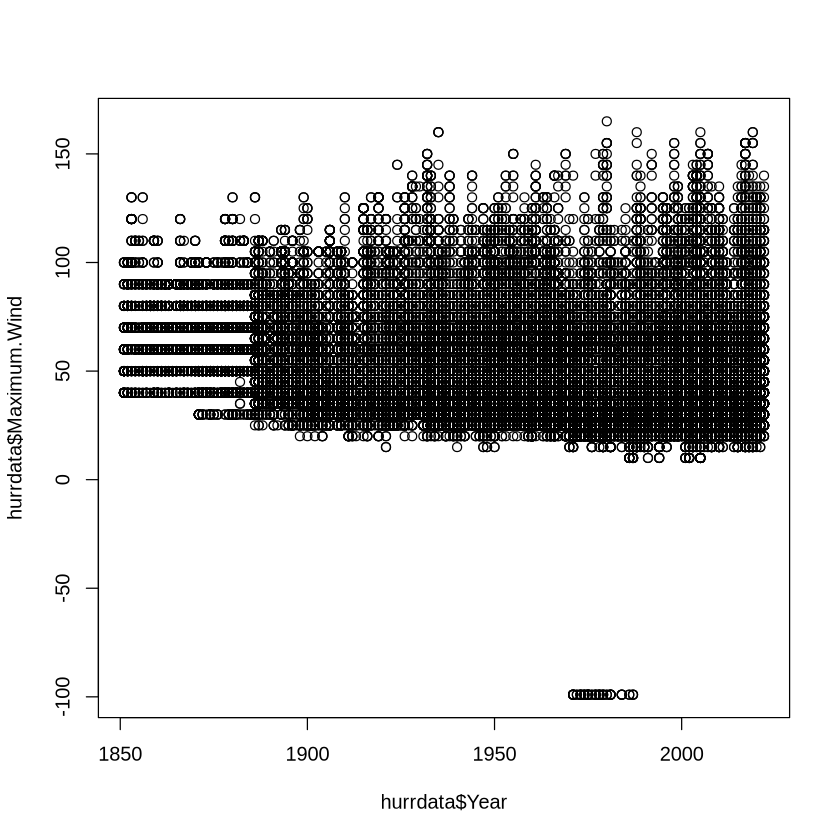

In [39]:
plot(hurrdata$Year, hurrdata$Maximum.Wind)

Wow, this plot looks quite horrible! Let us try to improve on it...


## Data Cleaning: Missing Data

Why are some wind speeds negative? If we looked into the metadata, we would find that we should have removed these! We can check on the negative data:

In [40]:
min(hurrdata$Maximum.Wind)

[1] -99

We can combine [] with logical operators like before to find all the values less than zero (< 0) and replace them with "NA", which means "No Data" in R.

In [41]:
hurrdata$Maximum.Wind[hurrdata$Maximum.Wind < 0] <- NA

We could also delete the whole observation, but this is bad practice!
Let's check on the results. It should print "NA".

In [42]:
min(hurrdata$Maximum.Wind)

[1] NA

To get the minimum wind speed excluding the NA values, we must call the min() function with na.rm = TRUE to instruct the function to ignore the NA values.

In [43]:
min(hurrdata$Maximum.Wind, na.rm = TRUE)

[1] 10

## Sampling the Data

We can also sample the data.frame to de-clutter the scatter plot. This is a two-step process in base R. First we use the sample() function to randomly select a desired quantity of row indexes/numbers for our data frame.

In [44]:
sample(nrow(hurrdata), 1000)

[1]  6419 15767 24833   343 10094 44973 26452 45881 32962 20842 25395 45401
  [13] 16532 17924 25014 52200  3228 53098 10981 22748 39932 20049 35939 10292
  [25]  4614  1401 44650 18268  7623  3670  3009 35956 47183 27377 24870 44322
  [37] 38490 13982 48028 32883 33245 14809  1147 52607 48251 30666 19530 49872
  [49] 37883 15063 47541 45619 23594  4418 49429 30703 20387 14477 32974 40953
  [61] 51307 17260 46645 27777 26922 38797 35180 43835 30859 15759 17442 40295
  [73] 13060 34911 47235 34101 52755 18299 17915 42210 10470 44480 50476  9793
  [85] 33178 34507 43310  2501 31582  2208 35488  1413 23538 13694  9031 11211
  [97]  4764 28600 50936 32499 35259  4615 19597 13374 15055 19192 47390  7838
 [109] 17252 27677 26538 12821 30265  4650 29461 11820 23302 29464 15677 52827
 [121] 40492 21350 32422 51387 36445 22129 39167 11457 44289  4088  6729 45865
 [133] 48381 26561  3761 35774 42933 12296 12193 36397 48490 41849 51616 38654
 [145] 32895 51701 24036 40545 29338 10675 19272 16667 41161 10531  2206 22534
 [157] 19821 25423 11917 23161 49537 38296  6057  6913 50149 31530 29736  4751
 [169] 41644 12639  5570 30286  5527 48635 23390 15609 35799 43510 26744   894
 [181] 21733 50355 38906 27864 20982 11173 36758 49223 34382 53415 47172 19717
 [193] 19048 16794 11420 47503 28717 47340 12699  6519 43694 41286 10144 31208
 [205] 28186 51097 13034 45258 42128 38794 38697 17209  6486   218 17594 29270
 [217] 37108 33652 35012 12541 15384 20604  2842 21816 18729 52270 18510 27106
 [229] 10122 39467 38602 49269 26593  8409  2695 41360 24494 13278 18798 41822
 [241]  4274  5565 36753 35727 13882 43338 13649 40152  7915 33151 38953  2922
 [253] 49610  4142 17621 51008 44879 32969 32914 43505 22122 43548 23846 48248
 [265] 19443 36084  3502 43391 43031 48298 14695 15929 13728 25910 13388 26786
 [277] 40815 42608 47140  7145 14122 50463  9943  8581 15924 35693  3031 41701
 [289]  6813 47858 40576 19623 47458 22956   688 53036 29868 49875 44065 31620
 [301] 29335 33660 38316 51363 38591 43591 16915 42483 43504 39031 24179 39211
 [313] 50304 28821 42304 28534  6593 47180  4928 52685 32375  4174 29351 42440
 [325] 17370  5797 24625 24451  9894  5447 49646 14218 20839 34415  1126 18481
 [337] 38198  6262 51402 22000 29738 34566 37649 40762 17940 11644 49456  4527
 [349]  6685  2236  6995 35968 17909 42147 48107 14840 38369 45335  6147 24675
 [361] 25439 45706 38583 52386 35696 34564 41047 51255 37224 15255 29702  3805
 [373] 44899 42136 30038 35190 37315 37692 10523 37702  3243  4907 20120 22716
 [385] 20638 35322 38924 23642 31457 51069 12044  9149 17426  6333  6384 30947
 [397] 14691 23418 26957 11634 15729 31946 15331 18959 26352  5171 15327  8451
 [409]  9508 16422 12174 47046 33459 22392 14775 39866 34722 33776 47579 47078
 [421] 28026 18471 11462   820  5225 35054 15611 47058  8508 45607 52596 25062
 [433] 47168 43440 27932 10102 10305  3380  1694  8738 20214 20610 26613 17317
 [445] 46072 49549 36400 52761 36259 50112 24664 40651 23500 45320 47878 39456
 [457] 42662 18197   689 23954 40257 35502 28179 22522 10540 28383 10478 48951
 [469]  6395 22869  4434 19122 46287 21309 24440 49818 29660 43460  2911 45215
 [481] 51857  4792  8788 27017 27545 42427 48463 37064 28875 40970 39290 14606
 [493] 33364 20433 29556  4778 36491 14051 52566 50815 13415 37057 47492 11972
 [505] 11799  9649 24170 29629 31253 41795  7597 19506 50646 19972  7857 44234
 [517] 41985 50295 29179 17527 13961   230 21898 24962 28895   212 20758  8576
 [529] 44303 20437  3111  9307 33416 46082 50937 35349  4261  5264 53122 37166
 [541] 21860 26852 27172 34049 31321 12717 53463  6113 30430 53192 28991  3227
 [553] 25178   306 13005 11193 41856  4550 20882 46972 22232 50574 39767  1079
 [565] 22580 50643 33699 44052 45697  7076 46598 48409 40709 44575 38649 37501
 [577] 14882 51788 24573 13883 13334 13399 21977 40489 40124 37771 14333 51078
 [589]  8092 27511 37214 43344 37626 43941 45653 36581 46369 22935 33113 10949
 [601] 33008 15513 35346  6550    64 33646 33987 2423

And then we use [] to extract those rows from the data frame.

In [45]:
hurrdata2 <- hurrdata[sample(nrow(hurrdata), 1000), ]

## Customizing the Scatter Plot

We can now plot the sampled data and use various additional arguments to add a title, axis labels, and customize the visualization to our liking.

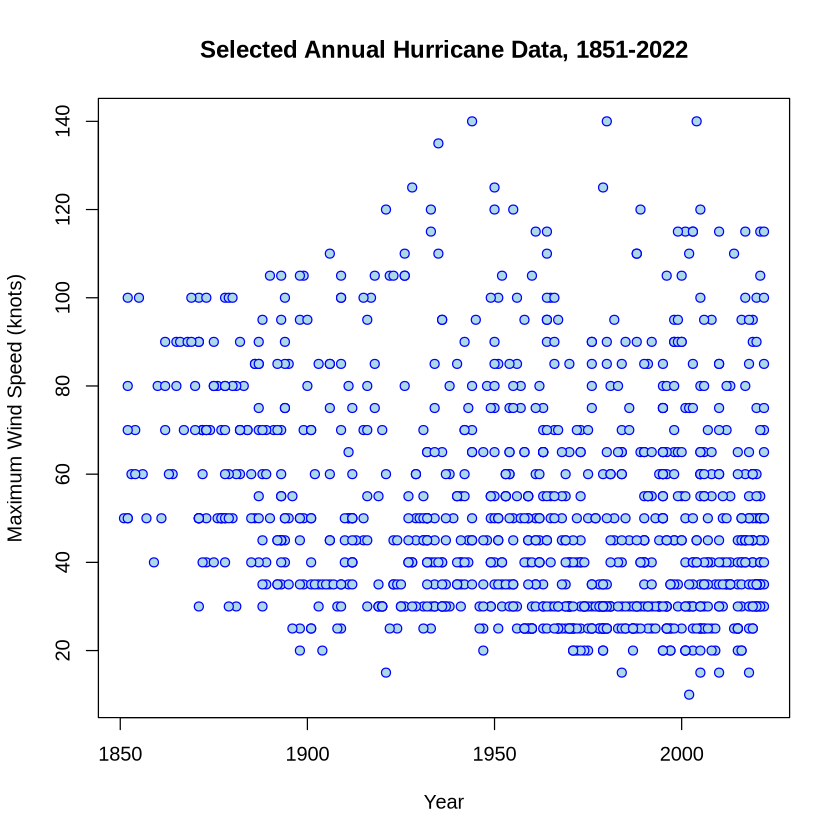

In [46]:
plot(x = hurrdata2$Year,
     y = hurrdata2$Maximum.Wind,
     main = "Selected Annual Hurricane Data, 1851-2022",
     xlab = "Year",
     ylab = "Maximum Wind Speed (knots)",
     pch = 21,          # type of symbol to use (see ?points for options)
     col = "blue",      # symbol line color
     bg = "lightblue")  # symbol fill color

We can also add a regression line by combining the abline() function with the linear model function. Note the special syntax used to define the formula.

In [47]:
abline(reg = lm(formula = Maximum.Wind ~ Year, data = hurrdata2),
       col = "red",     # line color
       lty = "dashed",  # line type
       lwd = 3)         # line width

ERROR: Error in int_abline(a = a, b = b, h = h, v = v, untf = untf, ...): plot.new has not been called yet


## Base R and the Tidyverse 

Thus far we have been working with what is called base R, that is R withoutany community-developed packages installed. Base R has a lot of built-in functionality and can easily do most things, but you may have noticed how some of the code has been a little clunky. Community-developed packages often provide alternative functions that produce the same result using less or more streamlined code and add new functions that do things base R simply cannot.

The most popular collection of R packages is called the Tidyverse, which is specifically designed for data science and often preferred by professionals. Tidyverse is a collection of several different packages, the following of which could be used to recreate our previous analysis using less code.

'readr' is a package used for reading and writing tabular data
'lubridate' is a package specifically designed to work with times and dates
'dplyr' is a package that allows for easy modification of data frames
'ggplot2' is a streamlined and user-friendly data visualization package


## Checking Installed Packages 
Depending on what system you are running this script on, you might already have tidyverse installed. This can be easily verified using the Packages tab to the right. Click on the Packages tab to view a list of installed packages. There is also a search bar that allows you to search for a specific package. Try searching for tidyverse to check whether you have it installed or not.

Alternatively we could use the installed.packages() function to see which packages are installed on our system. That function outputs a list of all installed packages. Using the %in% operator from before, we can check whether tidyverse appears in the list of installed packages or not.

In [ ]:
"tidyverse" %in% installed.packages()

This will return TRUE if you have tidyverse installed and FALSE if you do not.


## Installing Packages

We can install new packages using the install.packages() function. However, this function does not check if a package is already installed and will overwrite and re-install the specified package if it is already installed.

Hence you should only use install.packages() to install packages you do not already have installed or to update previously installed packages if needed.

The code block below first checks whether the tidyverse is installed or not.
If it is installed, a message stating so is displayed. Otherwise the function
install.packages() is called to install all of the packages in the tidyverse.
Note that the installation process could take several minutes to complete.

In [ ]:
if ("tidyverse" %in% installed.packages()) {
  message("Tidyverse already installed!")
} else {
  install.packages("tidyverse")
}

You only need to install packages on your machine once. The next time you use R on your computer, all of the tidyverse packages will already be installed.

You can also install packages via the Packages tab by clicking "Install".


## Calling a Library

Before we can use a package, we need to add it to our library. This can be done using the library() command. Using the tidyverse meta-package, we can easily add all of the tidyverse packages into our library at once.

In [ ]:
library(tidyverse)

Note how multiple different packages were attached to our library. Also note the reported conflicts. This means that some of the packages currently loaded into R have functions that share the same name. One of those functions masks the other one and gets called by default. To ensure a specific function from a specific package gets called, use the package::function() notation.

If you received an error stating that there is no package called "tidyverse",please follow the instructions in the previous section to install the package.

You can also include a package in your library by checking the box next to the corresponding package in the Packages tab.


## ADVANCED: Package Management Using Librarian 

Keeping track of which packages you have installed could be quite tiresome and continuously re-installing packages is a waste of time. Luckily there are some R packages that make package management in R significantly easier.

One of those packages is librarian. The shelf() command from the librarian package ensures that the package you want is loaded into your library and also installed if needed. This allows you to easily run the same script on different machines without having to worry about installing packages.But be warned that librarian does not display conflict warnings! Hence it is recommended to use the package::function() syntax when using librarian.

Let us install librarian if it is not present and then use it to both install and load a package called janitor that is useful for data cleaning.

In [ ]:
if (! "librarian" %in% installed.packages()) {
  install.packages("librarian")
}

In [ ]:
librarian::shelf(janitor)

## Rewriting the Analysis using Tidyverse

Now let us recreate our previous analysis using packages from the Tidyverse!
First we use read_csv() from the readr package to import the CSV data file.

In [ ]:
hurrdata3 <- readr::read_csv("atlantic.csv")

The readr::read_csv() function is much faster than read.csv() from base R but it does not reformat the column names. Luckily we can use the clean_names() function from the janitor package to convert the column names to snake_case.

In [ ]:
hurrdata3 <- janitor::clean_names(hurrdata3)

The date column can be converted to a date format using lubridate functions.

In [ ]:
lubridate::ymd(hurrdata3$date)

Combining this with mutate() from dplyr allows for easy overwriting.

In [ ]:
hurrdata3 <- dplyr::mutate(hurrdata3, date = lubridate::ymd(date))

Now we can combine the mutate() function from dplyr with the lubridate year() and month() functions to easily create new columns for the year and month.

In [ ]:
hurrdata3 <- dplyr::mutate(hurrdata3,
                           year = lubridate::year(date),
                           month = lubridate::month(date))

Dplyr can also easily convert values to NA and sample rows from a table.

In [ ]:
hurrdata3 <- dplyr::mutate(hurrdata3,
                           maximum_wind = dplyr::na_if(maximum_wind, -99))

hurrdata4 <- dplyr::sample_n(hurrdata3, 1000)

## Alternate (Better) Data Visualizations

Now we can use the popular ggplot2 graphing library to visualize our data.The ggplot2 library is included in the tidyverse and follows a layered logic.

First you specify the data frame of interest using the ggplot() function and then you create a mapping between variables (columns) and axes using the aes() function. This defines the plotting environment and we can add layers to the plot using the + operator. For example, geom_point() will generate a point for each x and y combination as specified with ggplot() and aes().

The plot object can be saved in a variable and then displayed by calling it.

In [ ]:
hurrgraph <- ggplot(data = hurrdata4, aes(x = year, y = maximum_wind)) +
  geom_point()

In [ ]:
hurrgraph

Note how the default plot looks slightly better than what the plot() function produces, but it is still quite bad. Luckily ggplot2 provides us with several customization options and we can tailor the visualization to our needs.

In [ ]:
hurrgraph2 <- ggplot(data = hurrdata4,
                     aes(x = year, y = maximum_wind, color = maximum_wind)) +
  geom_point() + # add the initial points
  scale_color_gradient(low = "blue", high = "red") + # generate color scheme
  theme(legend.position = "bottom") + # put the legend on the bottom
  ylab("Maximum Wind Speed (knots)") + # change the y-label
  ggtitle("Selected Annual Hurricane Data, 1851-2022") + # add a title
  theme(plot.title = element_text(lineheight = 0.8, face = "bold")) + # format
  theme(axis.text.x = element_text(angle = 45, hjust = 1, vjust = 0.5))

In [ ]:
hurrgraph2

While ggplot2 might appear to be more complicated to use than the built-in plot() function, it is actually much easier to create complex (and beautiful) data visualizations using ggplot2 than built-in graphing functionality. Many professionals also prefer ggplot2 and it is prevalent in various guides.


## ADVANCED: Piping and Grouping

Was it correct of us to sample the data given our hypothesis?
A closer look at it reveals that the data contains several entries for each hurricane at different points of intensity. Hence our approach was wrong.

To see how the maximum wind speed of hurricanes has changed over time, we should be looking at the maximum wind speed of each hurricane at its highest point of intensity. We can use functions from dplyr to extract those.

In [ ]:
hurrdata5 <- hurrdata3 %>%
  dplyr::group_by(name, year) %>%
  dplyr::summarize(maximum_wind = max(maximum_wind),
                   .groups = "drop")

The pipe operator %>% from the magrittr library is often used to combine several functions into a data analysis pipeline. The pipeline above finds the maximum value of the maximum_wind column for each unique hurricane name and year combination. The pipe operator takes whatever is passed to it and feeds it into the next function as the first argument. Tidyverse functions are built to work with the pipe operator but other functions might not be.

Now we can correctly visualize the change in maximum wind speed over time.

In [ ]:
hurrgraph3 <- ggplot(data = hurrdata5, aes(x = year, y = maximum_wind)) +
  geom_point() +
  geom_smooth(method = lm, formula = y ~ x) + # add a linear trend line
  ylab("Maximum Wind Speed (knots)") +
  ggtitle("Hurricane Wind Speeds at Highest Intensity 1851-2021")

In [ ]:
hurrgraph3

## EXERCISE: Fix the Analysis

Do you think we made a good graph that tells an accurate story?
Take a look at the year 1950. What do you think causes this sudden change?
Are we correctly extracting the maximum wind speed for each unique hurricane?
Is it fair to be comparing all the recorded hurricanes from 1850 until 2022?
Should we instead be looking at the most intensive hurricane from each year?

Fix the analysis above and produce a graph that answers the question:
How has the intensity of hurricanes changed over time?


## OPTIONAL: Interactive Graphics

We can easily create interactive data visualization in R using the plotly package. Plotly is not included in the tidyverse, so we have to install it (unless it is already installed) and load it into our library. We can use the shelf() function from the librarian package to easily do this as before.

In [ ]:
librarian::shelf(plotly)

In [ ]:

hurrdata6 <- hurrdata3 %>%
  dplyr::group_by(year) %>%
  dplyr::summarize(count = dplyr::n_distinct(id),
                   .groups = "drop")


In [ ]:
hurrgraph4 <- plotly::plot_ly(data = hurrdata6,
                              x = ~year,
                              y = ~count,
                              type = "bar",
                              marker = base::list(
                                color = "lightblue",
                                line = base::list(
                                  color = "blue",
                                  width = 0.5))) %>%
  plotly::layout(title = "Number of Hurricanes 1851 - 2022",
                 xaxis = base::list(title = "Year", tickangle = 45),
                 yaxis = base::list(title = "Recorded Number of Hurricanes"))

In [ ]:
hurrgraph4

## BONUS: Defining Functions

(Un)likely scenario: Suddenly you need to work with parametric equations.

For those of you who do not know, a parametric equation is where the x and y coordinates are both written in terms of another variable. This variable is called a parameter and is usually denoted with the letter t.

Let us say we were given the following parametric equation...

In [ ]:
x = 16*sin(t)^3
y = 13*cos(t) - 5*cos(2*t) - 2*cos(3*t) - cos(4*t)

...and asked to solve it for t ranging from 0 to 2*pi.

We can easily define our parameter as follows.

In [ ]:
t <- seq(0, 2 * pi, by = 0.1)

However, calculating all the x and y values would be extremely tedious if we had to do it manually. Luckily we can use R to make our computer do it for us. All we need to do is just tell R how to calculate these values by defining functions that take t as input and return the value of either x or y.

We can define the one for x as follows.

In [ ]:
get_x <- function(t) {
  x = 16 * sin(t)^3
  return(x)
}

Alternatively, we could also define it in one one line. We will do this for y. A one-line function like this is sometimes also called a lambda function.

In [ ]:
get_y <- function(t) 13*cos(t) - 5*cos(2*t) - 2*cos(3*t) - cos(4*t)

Now we can easily store all of our t, x, and y values into a data frame

In [ ]:
parameq <- data.frame(t = t)
parameq$x <- get_x(parameq$t)
parameq$y <- get_y(parameq$t)

Finally, let us plot the results of our parametric equation.
What do you think it will look like? Try to guess.

Note that this whole section on parametric equations was added for a very special version of this workshop that ran on February 14. Does that help?

In [ ]:
finalplot <- ggplot(data = parameq, aes(x = x, y = y)) +
  geom_polygon(linetype  = "solid",
               linewidth = 1.5,
               color = "black",
               fill = "red")

In [ ]:
finalplot

## FAQ

You might wonder what is the difference between "=" and "<-"?
Well, that is a good question and beyond the scope of this tutorial.But it is all about scope.

When you create a variable, it is always within some area that limits from where it is accessible, commonly called a scope.

"<-" puts a value in the user's workspace, which makes it accessible by said user anywhere, whereas "=" declares it in the scope of a function.